In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'P_50_T_250',
                          'min_1.e-24_max_1.e-18_ng_10',
                          'wgt_1_1_1_1_1_1_1_1_1_1',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03a_wn_540_620',
                               'P_50_T_250',
                               'min_1.e-24_max_1.e-18_ng_10',
                               'wgt_1_1_1_1_1_1_1_1_1_1',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7, ]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6, 7,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

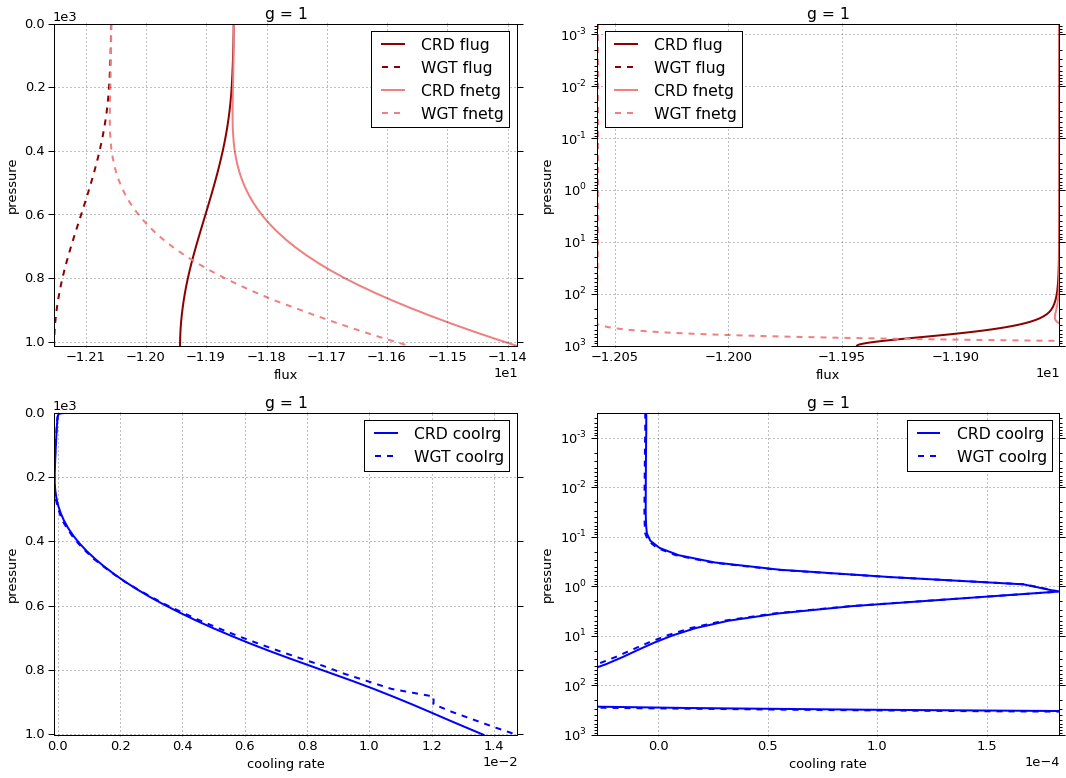

# Figure: flux, cooling rate. g-group 2

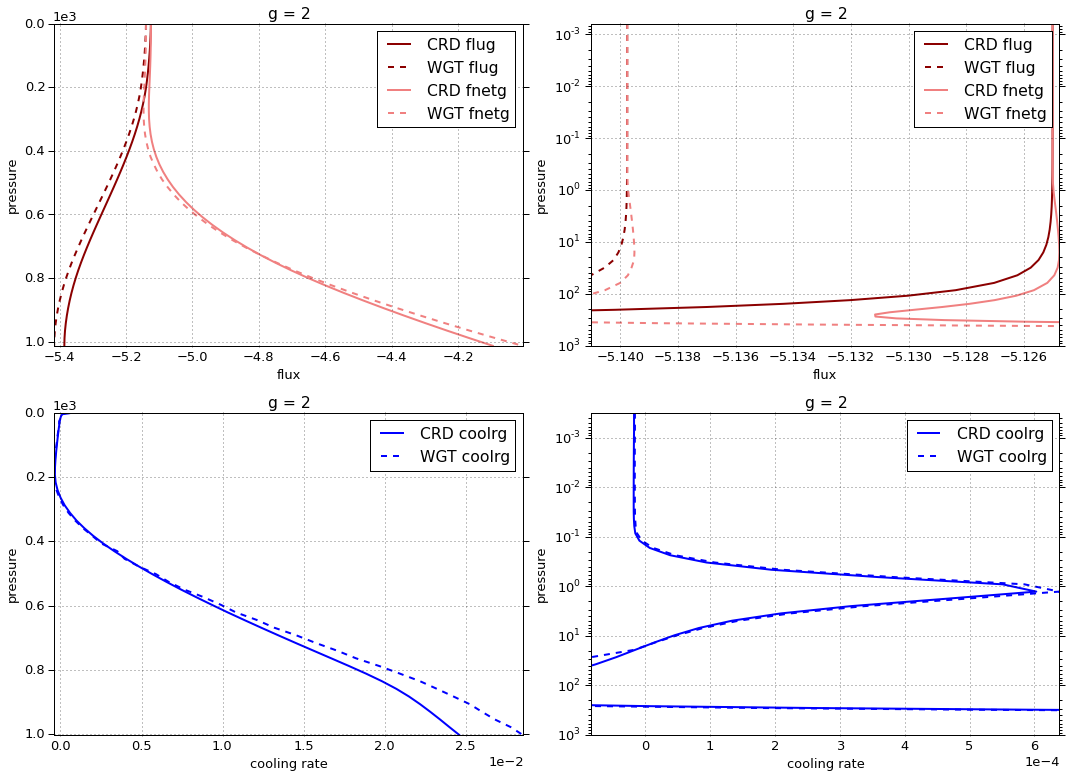

# Figure: flux, cooling rate. g-group 3

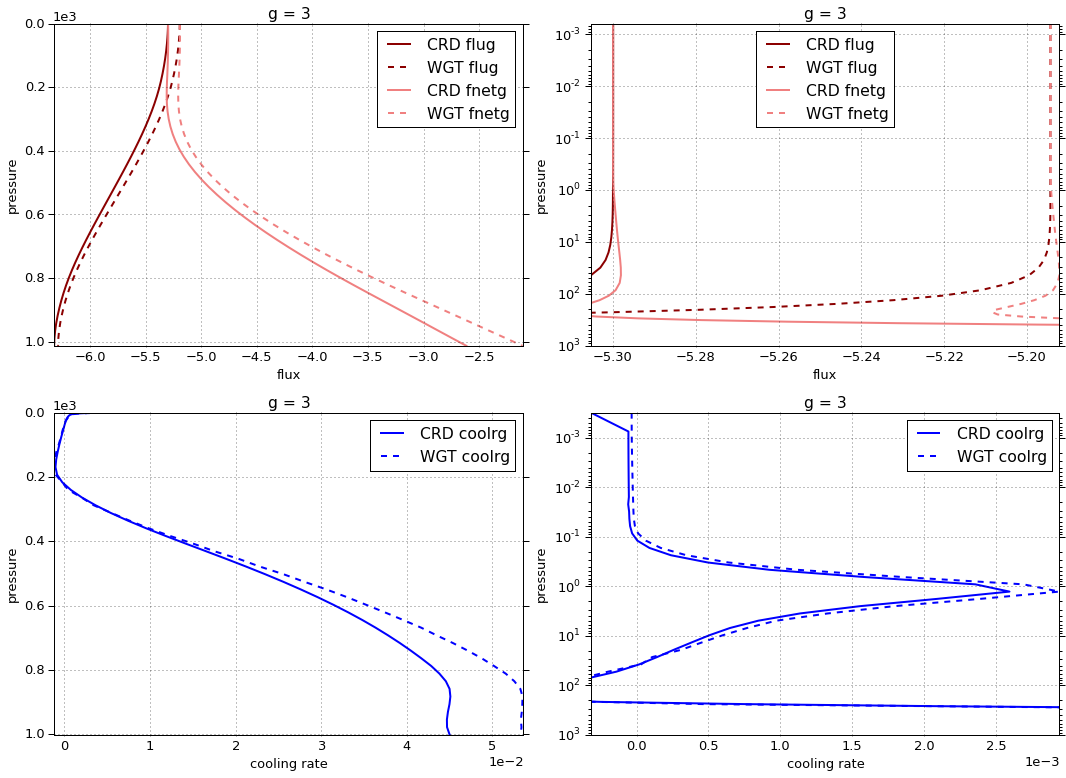

# Figure: flux, cooling rate. g-group 4

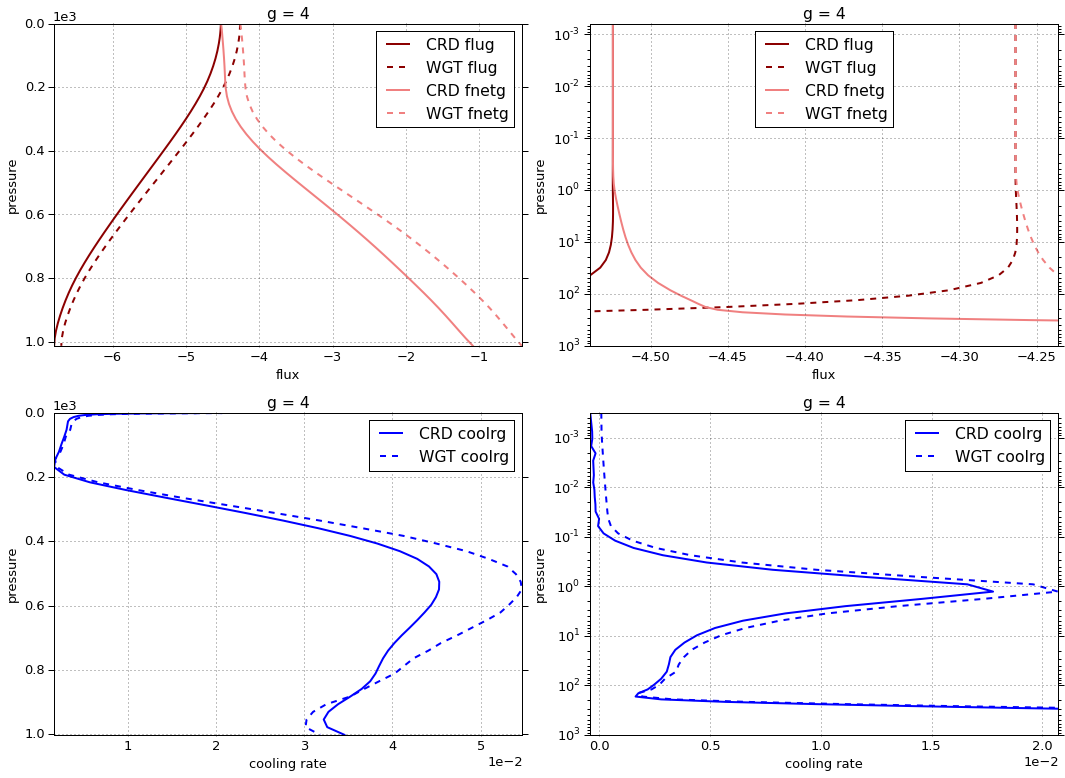

# Figure: flux, cooling rate. g-group 5

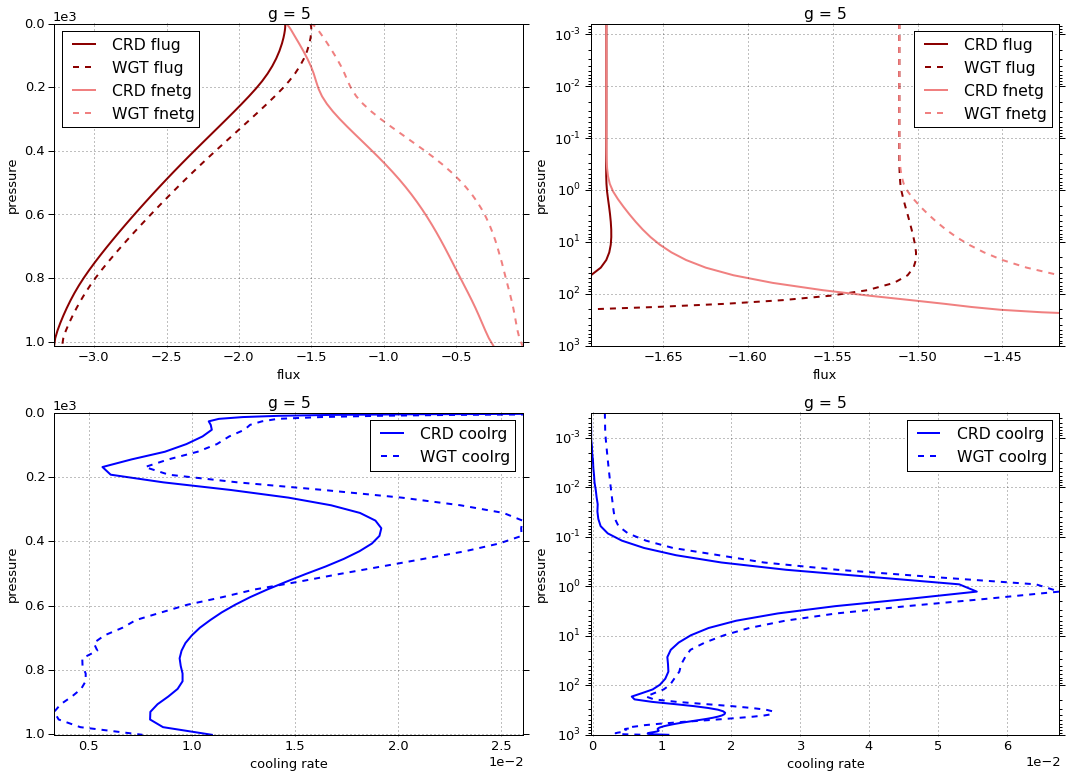

# Figure: flux, cooling rate. g-group 6

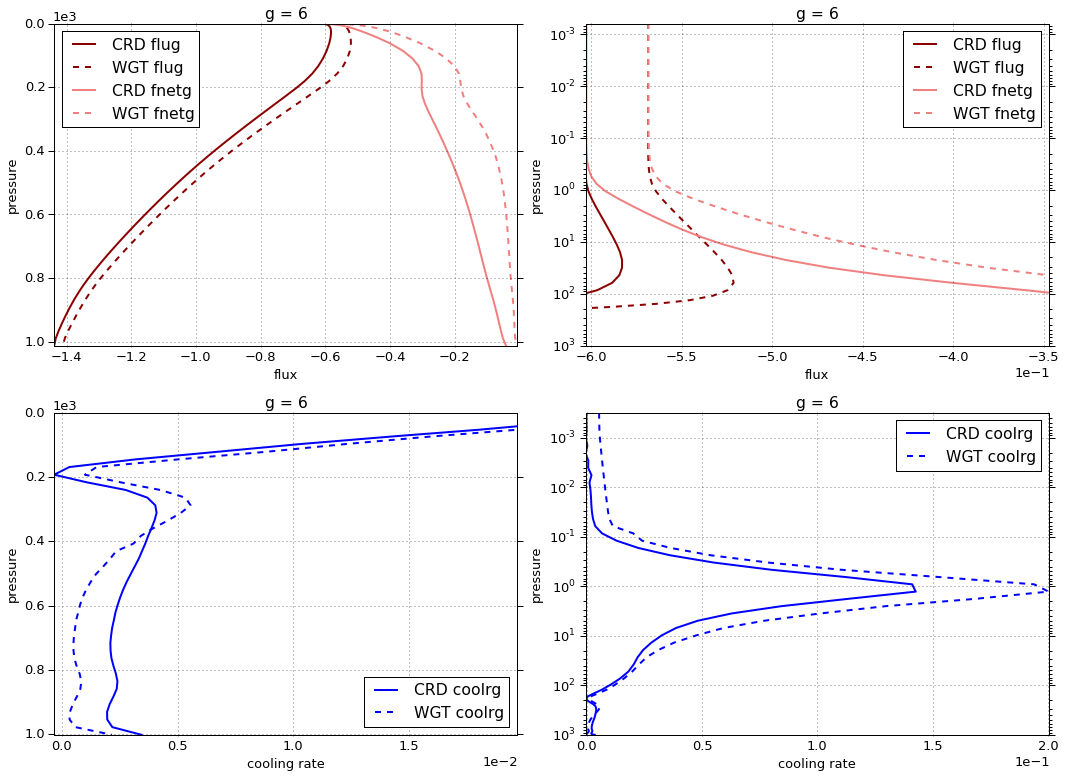

# Figure: flux, cooling rate. g-group 7

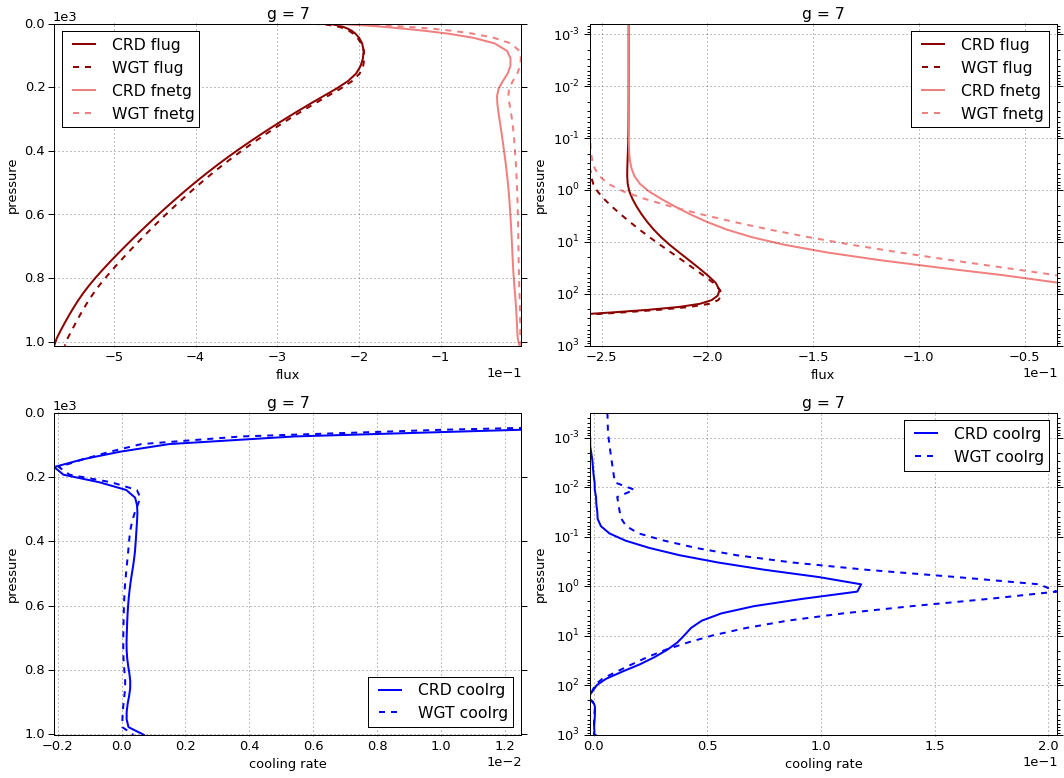

# Figure: flux, cooling rate. g-group total

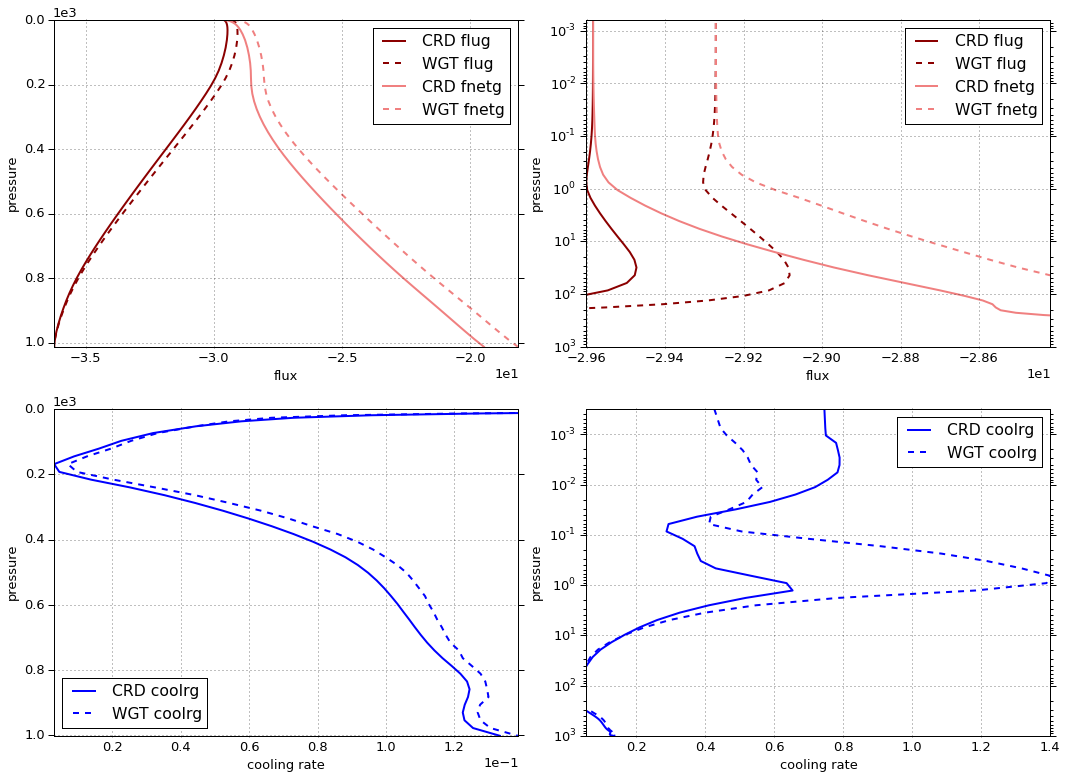

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0        1     -11.854432  0.000000 -11.854432
   1013     76    -11.943454  0.558289 -11.385166
2  0        1      -5.125006  0.000000  -5.125006
   1013     76     -5.385493  1.289544  -4.095949
3  0        1      -5.299967  0.000000  -5.299967
   1013     76     -6.324830  3.710468  -2.614361
4  0        1      -4.524349  0.000000  -4.524349
   1013     76     -6.798641  5.713888  -1.084753
5  0        1      -1.683705  0.000000  -1.683705
   1013     76     -3.275826  3.031755  -0.244071
6  0        1      -0.602784  0.000000  -0.602784
   1013     76     -1.438590  1.396616  -0.041974
7  0        1      -0.237271  0.000000  -0.237271
   1013     76     -0.573987  0.570723  -0.003264
8  0        1      -0.151087  0.000000  -0.151087
   1013     76     -0.307207  0.306270  -0.000937
9  0        1      -0.098673  0.000000  -0.098673
   1013     76     -0.173855  0.173543  -0.000312
10 0        1      -0.006135  0.000000  -0.006135
   1013     76     -0.013535  0.013527  -0.000007


WGT


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.057628  0.000000 -12.057628
   1013     76    -12.152168  0.587725 -11.564444
2  0        1      -5.139767  0.000000  -5.139767
   1013     76     -5.416148  1.409807  -4.006341
3  0        1      -5.194363  0.000000  -5.194363
   1013     76     -6.289459  4.180657  -2.108802
4  0        1      -4.263708  0.000000  -4.263708
   1013     76     -6.701620  6.284737  -0.416883
5  0        1      -1.510813  0.000000  -1.510813
   1013     76     -3.220886  3.178129  -0.042756
6  0        1      -0.568521  0.000000  -0.568521
   1013     76     -1.411651  1.404006  -0.007645
7  0        1      -0.255663  0.000000  -0.255663
   1013     76     -0.561124  0.560086  -0.001038
8  0        1      -0.174368  0.000000  -0.174368
   1013     76     -0.299846  0.299689  -0.000157
9  0        1      -0.100288  0.000000  -0.100288
   1013     76     -0.169371  0.169283  -0.000089
10 0        1      -0.005400  0.000000  -0.005400
   1013     76     -0.013146  0.013139  -0.000007


WGT - CRD


flug      fldg         fnetg
g  pressure level                                  
1  0        1     -0.203196  0.000000 -2.031960e-01
   1013     76    -0.208714  0.029436 -1.792780e-01
2  0        1     -0.014761  0.000000 -1.476100e-02
   1013     76    -0.030654  0.120262  8.960810e-02
3  0        1      0.105604  0.000000  1.056041e-01
   1013     76     0.035370  0.470188  5.055588e-01
4  0        1      0.260640  0.000000  2.606405e-01
   1013     76     0.097021  0.570849  6.678700e-01
5  0        1      0.172893  0.000000  1.728927e-01
   1013     76     0.054941  0.146374  2.013148e-01
6  0        1      0.034263  0.000000  3.426261e-02
   1013     76     0.026939  0.007390  3.432896e-02
7  0        1     -0.018392  0.000000 -1.839179e-02
   1013     76     0.012863 -0.010636  2.226344e-03
8  0        1     -0.023281  0.000000 -2.328091e-02
   1013     76     0.007361 -0.006581  7.799437e-04
9  0        1     -0.001615  0.000000 -1.615367e-03
   1013     76     0.004484 -0.004261  2.228330e-04
10 0        1      0.000735  0.000000  7.346155e-04
   1013     76     0.000389 -0.000388  5.812026e-07

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer          
1  0.000312    1     -0.000005
   1001.112500 75     0.013661
2  0.000312    1     -0.000017
   1001.112500 75     0.024595
3  0.000312    1     -0.000317
   1001.112500 75     0.045003
4  0.000312    1     -0.000397
   1001.112500 75     0.034553
5  0.000312    1     -0.000243
   1001.112500 75     0.010970
6  0.000312    1     -0.000187
   1001.112500 75     0.003448
7  0.000312    1     -0.001874
   1001.112500 75     0.000697
8  0.000312    1      0.000040
   1001.112500 75     0.000268
9  0.000312    1      0.499688
   1001.112500 75     0.000106
10 0.000312    1      0.248553
   1001.112500 75     0.000003


WGT


coolrg
g  pressure    layer          
1  0.000312    1     -0.000006
   1001.112500 75     0.014727
2  0.000312    1     -0.000016
   1001.112500 75     0.028510
3  0.000312    1     -0.000034
   1001.112500 75     0.053283
4  0.000312    1      0.000103
   1001.112500 75     0.031799
5  0.000312    1      0.001770
   1001.112500 75     0.007607
6  0.000312    1      0.005319
   1001.112500 75     0.002170
7  0.000312    1      0.005986
   1001.112500 75     0.000372
8  0.000312    1      0.000533
   1001.112500 75     0.000057
9  0.000312    1      0.163828
   1001.112500 75     0.000032
10 0.000312    1      0.248275
   1001.112500 75     0.000002


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -4.577267e-07
   1001.112500 75     1.065792e-03
2  0.000312    1      1.352298e-06
   1001.112500 75     3.914647e-03
3  0.000312    1      2.829701e-04
   1001.112500 75     8.280233e-03
4  0.000312    1      5.006863e-04
   1001.112500 75    -2.754078e-03
5  0.000312    1      2.013015e-03
   1001.112500 75    -3.362303e-03
6  0.000312    1      5.506211e-03
   1001.112500 75    -1.277531e-03
7  0.000312    1      7.859805e-03
   1001.112500 75    -3.240854e-04
8  0.000312    1      4.931558e-04
   1001.112500 75    -2.108411e-04
9  0.000312    1     -3.358592e-01
   1001.112500 75    -7.358083e-05
10 0.000312    1     -2.777100e-04
   1001.112500 75    -2.087400e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.583409,0.000000,-29.583409
1013,76,-36.235419,16.764624,-19.470795



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-29.270519,0.000000,-29.270519
1013,76,-36.235419,18.087257,-18.148163



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,3.128895e-01,0.000000,0.312889
1013,76,4.100000e-08,1.322632,1.322632


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.745239
1001.112500,75,0.133301



WGT


,,coolrg
pressure,layer,
0.000312,1,0.425759
1001.112500,75,0.138559



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.319480
1001.112500,75,0.005258


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.329562,0.335367
2,0.148438,0.149471
3,0.174437,0.173572
4,0.187750,0.184947
5,0.090500,0.088888
6,0.039750,0.038958
7,0.015875,0.015486
8,0.008500,0.008275
9,0.004812,0.004674


In [17]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -11.854432  0.000000e+00 -11.854432   1     1   
0.000624      1     2 -11.854432  3.718997e-10 -11.854432   1     2   
0.000876      1     3 -11.854432  5.242839e-10 -11.854432   1     3   
0.001229      1     4 -11.854432  7.448218e-10 -11.854432   1     4   
0.001723      1     5 -11.854432  1.065324e-09 -11.854432   1     5   
0.002417      1     6 -11.854432  1.531089e-09 -11.854432   1     6   
0.003391      1     7 -11.854432  2.208034e-09 -11.854432   1     7   
0.004757      1     8 -11.854432  3.191947e-09 -11.854432   1     8   
0.006672      1     9 -11.854432  4.621969e-09 -11.854432   1     9   
0.009359      1    10 -11.854432  6.700505e-09 -11.854432   1    10   
0.013128      1    11 -11.854432  9.721785e-09 -11.854432   1    11   
0.018415      1    12 -11.854432  1.411381e-08 -11.854432   1    12   
0.025830      1    13 -11.854432  2.049924e-08 -11.854432   1    13   
0.036232      1    14 -11.854432  2.978590e-08 -11.854432   1    14   
0.050823      1    15 -11.854432  4.337922e-08 -11.854432   1    15   
0.071291      1    16 -11.854432  6.481646e-08 -11.854432   1    16   
0.100000      1    17 -11.854432  1.050487e-07 -11.854432   1    17   
0.140271      1    18 -11.854432  1.902742e-07 -11.854432   1    18   
0.196760      1    19 -11.854432  3.742056e-07 -11.854432   1    19   
0.275997      1    20 -11.854433  7.725727e-07 -11.854432   1    20   
0.387100      1    21 -11.854433  1.637112e-06 -11.854431   1    21   
0.543100      1    22 -11.854434  3.518023e-06 -11.854430   1    22   
0.761700      1    23 -11.854435  7.580905e-06 -11.854428   1    23   
1.068500      1    24 -11.854437  1.557999e-05 -11.854422   1    24   
1.498800      1    25 -11.854440  2.748110e-05 -11.854412   1    25   
2.102400      1    26 -11.854444  4.090908e-05 -11.854403   1    26   
2.949000      1    27 -11.854449  5.506723e-05 -11.854394   1    27   
4.136600      1    28 -11.854456  7.001214e-05 -11.854386   1    28   
5.802500      1    29 -11.854466  8.623797e-05 -11.854380   1    29   
8.139200      1    30 -11.854480  1.047351e-04 -11.854375   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -11.864981  8.934048e-03 -11.856047   1    47   
347.300000    1    48 -11.867103  1.162273e-02 -11.855480   1    48   
371.075000    1    49 -11.869462  1.493305e-02 -11.854529   1    49   
394.850000    1    50 -11.872050  1.894314e-02 -11.853106   1    50   
418.625000    1    51 -11.874852  2.372874e-02 -11.851123   1    51   
442.400000    1    52 -11.877853  2.936373e-02 -11.848490   1    52   
466.175000    1    53 -11.881034  3.591763e-02 -11.845117   1    53   
489.950000    1    54 -11.884375  4.345475e-02 -11.840920   1    54   
513.725000    1    55 -11.887852  5.203634e-02 -11.835816   1    55   
537.500000    1    56 -11.891444  6.172797e-02 -11.829716   1    56   
561.275000    1    57 -11.895124  7.259404e-02 -11.822530   1    57   
585.050000    1    58 -11.898867  8.468970e-02 -11.814177   1    58   
608.825000    1    59 -11.902645  9.808857e-02 -11.804556   1    59   
632.600000    1    60 -11.906428  1.128548e-01 -11.793573   1    60   
656.375000    1    61 -11.910186  1.290247e-01 -11.781161   1    61   
680.150000    1    62 -11.913886  1.466692e-01 -11.767217   1    62   
703.925000    1    63 -11.917495  1.658485e-01 -11.751647   1    63   
727.700000    1    64 -11.920978  1.865951e-01 -11.734383   1    64   
751.475000    1    65 -11.924300  2.089630e-01 -11.715337   1    65   
775.250000    1    66 -11.927424  2.330027e-01 -11.694422   1    66   
799.025000    1    67 -11.930318  2.587386e-01 -11.671580   1    67   
822.800000    1    68 -11.932953  2.861515e-01 -11.646802   1    68   
846.575000    1    69 -11.935310  3.

In [18]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -5.125006  0.000000e+00 -5.125006   2     1 -5.139767   
0.000624      2     2 -5.125006  1.246680e-09 -5.125006   2     2 -5.139767   
0.000876      2     3 -5.125006  1.757668e-09 -5.125006   2     3 -5.139767   
0.001229      2     4 -5.125006  2.497578e-09 -5.125006   2     4 -5.139767   
0.001723      2     5 -5.125006  3.573480e-09 -5.125006   2     5 -5.139767   
0.002417      2     6 -5.125006  5.137892e-09 -5.125006   2     6 -5.139767   
0.003391      2     7 -5.125006  7.412873e-09 -5.125006   2     7 -5.139767   
0.004757      2     8 -5.125006  1.072131e-08 -5.125006   2     8 -5.139767   
0.006672      2     9 -5.125006  1.553254e-08 -5.125006   2     9 -5.139767   
0.009359      2    10 -5.125006  2.252987e-08 -5.125006   2    10 -5.139767   
0.013128      2    11 -5.125006  3.270760e-08 -5.125006   2    11 -5.139767   
0.018415      2    12 -5.125006  4.751395e-08 -5.125006   2    12 -5.139767   
0.025830      2    13 -5.125006  6.905934e-08 -5.125006   2    13 -5.139767   
0.036232      2    14 -5.125006  1.004275e-07 -5.125006   2    14 -5.139767   
0.050823      2    15 -5.125006  1.464087e-07 -5.125006   2    15 -5.139767   
0.071291      2    16 -5.125006  2.190708e-07 -5.125006   2    16 -5.139767   
0.100000      2    17 -5.125006  3.556233e-07 -5.125006   2    17 -5.139767   
0.140271      2    18 -5.125007  6.443138e-07 -5.125006   2    18 -5.139768   
0.196760      2    19 -5.125007  1.263901e-06 -5.125006   2    19 -5.139768   
0.275997      2    20 -5.125008  2.593715e-06 -5.125006   2    20 -5.139769   
0.387100      2    21 -5.125010  5.443989e-06 -5.125004   2    21 -5.139770   
0.543100      2    22 -5.125012  1.154847e-05 -5.125001   2    22 -5.139772   
0.761700      2    23 -5.125016  2.448841e-05 -5.124991   2    23 -5.139776   
1.068500      2    24 -5.125021  4.955149e-05 -5.124971   2    24 -5.139779   
1.498800      2    25 -5.125028  8.693296e-05 -5.124941   2    25 -5.139784   
2.102400      2    26 -5.125038  1.300820e-04 -5.124908   2    26 -5.139793   
2.949000      2    27 -5.125053  1.770346e-04 -5.124876   2    27 -5.139806   
4.136600      2    28 -5.125075  2.284635e-04 -5.124846   2    28 -5.139826   
5.802500      2    29 -5.125107  2.866495e-04 -5.124820   2    29 -5.139856   
8.139200      2    30 -5.125153  3.558838e-04 -5.124797   2    30 -5.139900   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -5.166260  3.750118e-02 -5.128759   2    47 -5.183107   
347.300000    2    48 -5.173435  4.746761e-02 -5.125968   2    48 -5.190698   
371.075000    2    49 -5.181182  5.936814e-02 -5.121814   2    49 -5.198914   
394.850000    2    50 -5.189455  7.333504e-02 -5.116120   2    50 -5.207652   
418.625000    2    51 -5.198195  8.950957e-02 -5.108685   2    51 -5.216991   
442.400000    2    52 -5.207345  1.080126e-01 -5.099332   2    52 -5.226729   
466.175000    2    53 -5.216843  1.289375e-01 -5.087905   2    53 -5.236845   
489.950000    2    54 -5.226633  1.523607e-01 -5.074272   2    54 -5.247291   
513.725000    2    55 -5.236650  1.783370e-01 -5.058313   2    55 -5.257996   
537.500000    2    56 -5.246840  2.069137e-01 -5.039926   2    56 -5.268802   
561.275000    2    57 -5.257136  2.381228e-01 -5.019013   2    57 -5.279861   
585.050000    2    58 -5.267478  2.720233e-01 -4.995455   2    58 -5.290872   
608.825000    2    59 -5.277801  3.086225e-01 -4.969178   2    59 -5.301941   
632.600000    2    60 -5.288036  3.479217e-01 -4.940114   2    60 -5.312836   
656.375000    2    61 -5.298114  3.899477e-01 -4.908166   2    61 -5.323624   
680.150000    2    62 -5.307961  4.346733e-01 -4.873287   2    62 -5.334127   
703.925000    2    63 -5.317501  4.820748e-01 -4.835427   2   

In [19]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -5.299967  0.000000e+00 -5.299967   3     1 -5.194363   
0.000624      3     2 -5.299967  5.437114e-09 -5.299967   3     2 -5.194363   
0.000876      3     3 -5.299967  7.664865e-09 -5.299967   3     3 -5.194363   
0.001229      3     4 -5.299967  1.088757e-08 -5.299967   3     4 -5.194363   
0.001723      3     5 -5.299967  1.556918e-08 -5.299967   3     5 -5.194363   
0.002417      3     6 -5.299967  2.237001e-08 -5.299967   3     6 -5.194363   
0.003391      3     7 -5.299967  3.225070e-08 -5.299967   3     7 -5.194363   
0.004757      3     8 -5.299967  4.660712e-08 -5.299967   3     8 -5.194363   
0.006672      3     9 -5.299967  6.746713e-08 -5.299967   3     9 -5.194363   
0.009359      3    10 -5.299968  9.778207e-08 -5.299967   3    10 -5.194363   
0.013128      3    11 -5.299968  1.418461e-07 -5.299967   3    11 -5.194363   
0.018415      3    12 -5.299968  2.059157e-07 -5.299967   3    12 -5.194364   
0.025830      3    13 -5.299968  2.991151e-07 -5.299968   3    13 -5.194364   
0.036232      3    14 -5.299968  4.347966e-07 -5.299968   3    14 -5.194364   
0.050823      3    15 -5.299968  6.337474e-07 -5.299968   3    15 -5.194364   
0.071291      3    16 -5.299969  9.476274e-07 -5.299968   3    16 -5.194364   
0.100000      3    17 -5.299969  1.532743e-06 -5.299968   3    17 -5.194365   
0.140271      3    18 -5.299971  2.753281e-06 -5.299968   3    18 -5.194366   
0.196760      3    19 -5.299973  5.333395e-06 -5.299967   3    19 -5.194367   
0.275997      3    20 -5.299976  1.077825e-05 -5.299965   3    20 -5.194369   
0.387100      3    21 -5.299981  2.223220e-05 -5.299958   3    21 -5.194372   
0.543100      3    22 -5.299988  4.626755e-05 -5.299941   3    22 -5.194376   
0.761700      3    23 -5.299996  9.611889e-05 -5.299900   3    23 -5.194377   
1.068500      3    24 -5.300006  1.911259e-04 -5.299815   3    24 -5.194374   
1.498800      3    25 -5.300016  3.339531e-04 -5.299682   3    25 -5.194367   
2.102400      3    26 -5.300037  5.042634e-04 -5.299533   3    26 -5.194366   
2.949000      3    27 -5.300075  6.978045e-04 -5.299377   3    27 -5.194380   
4.136600      3    28 -5.300138  9.208239e-04 -5.299217   3    28 -5.194416   
5.802500      3    29 -5.300238  1.188015e-03 -5.299050   3    29 -5.194492   
8.139200      3    30 -5.300396  1.526218e-03 -5.298870   3    30 -5.194619   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -5.502988  2.244770e-01 -5.278511   3    47 -5.409464   
347.300000    3    48 -5.533529  2.758536e-01 -5.257675   3    48 -5.442088   
371.075000    3    49 -5.565634  3.348036e-01 -5.230831   3    49 -5.476542   
394.850000    3    50 -5.599080  4.014903e-01 -5.197590   3    50 -5.512452   
418.625000    3    51 -5.633651  4.758999e-01 -5.157751   3    51 -5.549584   
442.400000    3    52 -5.669136  5.579267e-01 -5.111209   3    52 -5.587666   
466.175000    3    53 -5.705349  6.473332e-01 -5.058015   3    53 -5.626738   
489.950000    3    54 -5.742120  7.438033e-01 -4.998317   3    54 -5.666348   
513.725000    3    55 -5.779289  8.469502e-01 -4.932338   3    55 -5.706420   
537.500000    3    56 -5.816700  9.563706e-01 -4.860329   3    56 -5.746757   
561.275000    3    57 -5.854197  1.071632e+00 -4.782565   3    57 -5.787202   
585.050000    3    58 -5.891612  1.192308e+00 -4.699303   3    58 -5.827571   
608.825000    3    59 -5.928771  1.317932e+00 -4.610839   3    59 -5.867592   
632.600000    3    60 -5.965497  1.448044e+00 -4.517453   3    60 -5.907220   
656.375000    3    61 -6.001600  1.582173e+00 -4.419427   3    61 -5.946071   
680.150000    3    62 -6.036870  1.719828e+00 -4.317043   3    62 -5.983963   
703.925000    3    63 -6.071088  1.860514e+00 -4.210574   3   

In [20]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -4.524349  0.000000e+00 -4.524349   4     1 -4.263708   
0.000624      4     2 -4.524349  6.110788e-08 -4.524349   4     2 -4.263708   
0.000876      4     3 -4.524349  8.606989e-08 -4.524349   4     3 -4.263708   
0.001229      4     4 -4.524349  1.219508e-07 -4.524349   4     4 -4.263708   
0.001723      4     5 -4.524349  1.737262e-07 -4.524349   4     5 -4.263708   
0.002417      4     6 -4.524349  2.484345e-07 -4.524349   4     6 -4.263708   
0.003391      4     7 -4.524349  3.562453e-07 -4.524349   4     7 -4.263709   
0.004757      4     8 -4.524349  5.118314e-07 -4.524349   4     8 -4.263709   
0.006672      4     9 -4.524350  7.363541e-07 -4.524349   4     9 -4.263709   
0.009359      4    10 -4.524350  1.060380e-06 -4.524349   4    10 -4.263709   
0.013128      4    11 -4.524351  1.528030e-06 -4.524349   4    11 -4.263709   
0.018415      4    12 -4.524351  2.203039e-06 -4.524349   4    12 -4.263710   
0.025830      4    13 -4.524353  3.177492e-06 -4.524349   4    13 -4.263711   
0.036232      4    14 -4.524354  4.584752e-06 -4.524350   4    14 -4.263711   
0.050823      4    15 -4.524356  6.629793e-06 -4.524350   4    15 -4.263713   
0.071291      4    16 -4.524360  9.784049e-06 -4.524350   4    16 -4.263715   
0.100000      4    17 -4.524364  1.534831e-05 -4.524349   4    17 -4.263717   
0.140271      4    18 -4.524372  2.612555e-05 -4.524345   4    18 -4.263721   
0.196760      4    19 -4.524382  4.730404e-05 -4.524335   4    19 -4.263725   
0.275997      4    20 -4.524397  8.895061e-05 -4.524308   4    20 -4.263728   
0.387100      4    21 -4.524415  1.707678e-04 -4.524244   4    21 -4.263724   
0.543100      4    22 -4.524431  3.314148e-04 -4.524099   4    22 -4.263703   
0.761700      4    23 -4.524430  6.437003e-04 -4.523787   4    23 -4.263636   
1.068500      4    24 -4.524390  1.207381e-03 -4.523183   4    24 -4.263487   
1.498800      4    25 -4.524311  2.034875e-03 -4.522277   4    25 -4.263263   
2.102400      4    26 -4.524254  3.019238e-03 -4.521235   4    26 -4.263022   
2.949000      4    27 -4.524256  4.135965e-03 -4.520120   4    27 -4.262810   
4.136600      4    28 -4.524348  5.409165e-03 -4.518938   4    28 -4.262674   
5.802500      4    29 -4.524566  6.908487e-03 -4.517657   4    29 -4.262615   
8.139200      4    30 -4.524971  8.762245e-03 -4.516209   4    30 -4.262701   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -5.070472  8.163149e-01 -4.254157   4    47 -4.836122   
347.300000    4    48 -5.142260  9.658805e-01 -4.176379   4    48 -4.912911   
371.075000    4    49 -5.215785  1.128403e+00 -4.087382   4    49 -4.991526   
394.850000    4    50 -5.290565  1.302288e+00 -3.988277   4    50 -5.071319   
418.625000    4    51 -5.366143  1.485692e+00 -3.880452   4    51 -5.152676   
442.400000    4    52 -5.442162  1.676740e+00 -3.765422   4    52 -5.234005   
466.175000    4    53 -5.518349  1.873496e+00 -3.644853   4    53 -5.316054   
489.950000    4    54 -5.594509  2.073993e+00 -3.520517   4    54 -5.397654   
513.725000    4    55 -5.670510  2.276684e+00 -3.393826   4    55 -5.479992   
537.500000    4    56 -5.746199  2.479983e+00 -3.266216   4    56 -5.561674   
561.275000    4    57 -5.821446  2.682760e+00 -3.138686   4    57 -5.642836   
585.050000    4    58 -5.896083  2.883954e+00 -3.012129   4    58 -5.723755   
608.825000    4    59 -5.969928  3.082863e+00 -2.887065   4    59 -5.803605   
632.600000    4    60 -6.042796  3.278656e+00 -2.764140   4    60 -5.882645   
656.375000    4    61 -6.114448  3.470930e+00 -2.643519   4    61 -5.960336   
680.150000    4    62 -6.184638  3.659291e+00 -2.525347   4    62 -6.036527   
703.925000    4    63 -6.253046  3.843332e+00 -2.409713   4   

In [21]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -1.683705  0.000000e+00 -1.683705   5     1 -1.510813   
0.000624      5     2 -1.683706  2.350831e-07 -1.683705   5     2 -1.510813   
0.000876      5     3 -1.683706  3.310091e-07 -1.683705   5     3 -1.510813   
0.001229      5     4 -1.683706  4.685828e-07 -1.683705   5     4 -1.510813   
0.001723      5     5 -1.683706  6.666221e-07 -1.683705   5     5 -1.510813   
0.002417      5     6 -1.683706  9.516874e-07 -1.683705   5     6 -1.510813   
0.003391      5     7 -1.683707  1.362056e-06 -1.683705   5     7 -1.510813   
0.004757      5     8 -1.683707  1.952806e-06 -1.683705   5     8 -1.510813   
0.006672      5     9 -1.683708  2.803151e-06 -1.683705   5     9 -1.510814   
0.009359      5    10 -1.683709  4.027176e-06 -1.683705   5    10 -1.510814   
0.013128      5    11 -1.683711  5.789035e-06 -1.683705   5    11 -1.510815   
0.018415      5    12 -1.683713  8.325049e-06 -1.683705   5    12 -1.510816   
0.025830      5    13 -1.683716  1.197534e-05 -1.683704   5    13 -1.510817   
0.036232      5    14 -1.683720  1.723035e-05 -1.683703   5    14 -1.510818   
0.050823      5    15 -1.683726  2.483979e-05 -1.683702   5    15 -1.510820   
0.071291      5    16 -1.683735  3.647249e-05 -1.683699   5    16 -1.510823   
0.100000      5    17 -1.683748  5.654261e-05 -1.683691   5    17 -1.510826   
0.140271      5    18 -1.683765  9.421016e-05 -1.683671   5    18 -1.510827   
0.196760      5    19 -1.683787  1.658177e-04 -1.683622   5    19 -1.510821   
0.275997      5    20 -1.683810  3.018775e-04 -1.683508   5    20 -1.510786   
0.387100      5    21 -1.683823  5.597777e-04 -1.683263   5    21 -1.510719   
0.543100      5    22 -1.683793  1.047300e-03 -1.682745   5    22 -1.510556   
0.761700      5    23 -1.683652  1.956393e-03 -1.681696   5    23 -1.510202   
1.068500      5    24 -1.683303  3.535700e-03 -1.679767   5    24 -1.509500   
1.498800      5    25 -1.682727  5.794772e-03 -1.676932   5    25 -1.508438   
2.102400      5    26 -1.682107  8.446490e-03 -1.673660   5    26 -1.507236   
2.949000      5    27 -1.681546  1.140812e-02 -1.670138   5    27 -1.505955   
4.136600      5    28 -1.681101  1.473598e-02 -1.666365   5    28 -1.504731   
5.802500      5    29 -1.680832  1.856920e-02 -1.662262   5    29 -1.503564   
8.139200      5    30 -1.680803  2.318781e-02 -1.657615   5    30 -1.502474   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -2.137757  8.841112e-01 -1.253646   5    47 -1.976965   
347.300000    5    48 -2.190948  9.905250e-01 -1.200423   5    48 -2.034657   
371.075000    5    49 -2.244099  1.097705e+00 -1.146394   5    49 -2.092385   
394.850000    5    50 -2.296950  1.204327e+00 -1.092623   5    50 -2.149594   
418.625000    5    51 -2.349227  1.309346e+00 -1.039882   5    51 -2.206177   
442.400000    5    52 -2.400769  1.411939e+00 -0.988830   5    52 -2.261799   
466.175000    5    53 -2.451474  1.511564e+00 -0.939910   5    53 -2.316489   
489.950000    5    54 -2.501327  1.607845e+00 -0.893483   5    54 -2.370284   
513.725000    5    55 -2.550384  1.700558e+00 -0.849826   5    55 -2.423217   
537.500000    5    56 -2.598668  1.789870e+00 -0.808798   5    56 -2.475196   
561.275000    5    57 -2.646217  1.875897e+00 -0.770320   5    57 -2.526576   
585.050000    5    58 -2.693026  1.958841e+00 -0.734184   5    58 -2.577052   
608.825000    5    59 -2.739078  2.038967e+00 -0.700111   5    59 -2.626894   
632.600000    5    60 -2.784342  2.116470e+00 -0.667872   5    60 -2.675913   
656.375000    5    61 -2.828778  2.191587e+00 -0.637191   5    61 -2.724415   
680.150000    5    62 -2.872315  2.264388e+00 -0.607927   5    62 -2.771502   
703.925000    5    63 -2.914859  2.335095e+00 -0.579764   5   

In [22]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      6     1 -0.602784  0.000000e+00 -0.602784   6     1 -0.568521   
0.000624      6     2 -0.602784  6.417114e-07 -0.602784   6     2 -0.568521   
0.000876      6     3 -0.602785  9.039154e-07 -0.602784   6     3 -0.568522   
0.001229      6     4 -0.602785  1.281046e-06 -0.602784   6     4 -0.568522   
0.001723      6     5 -0.602786  1.825572e-06 -0.602784   6     5 -0.568522   
0.002417      6     6 -0.602786  2.611709e-06 -0.602784   6     6 -0.568522   
0.003391      6     7 -0.602788  3.746685e-06 -0.602784   6     7 -0.568523   
0.004757      6     8 -0.602789  5.385169e-06 -0.602784   6     8 -0.568523   
0.006672      6     9 -0.602791  7.750096e-06 -0.602783   6     9 -0.568524   
0.009359      6    10 -0.602794  1.116317e-05 -0.602783   6    10 -0.568525   
0.013128      6    11 -0.602798  1.608800e-05 -0.602782   6    11 -0.568526   
0.018415      6    12 -0.602804  2.319274e-05 -0.602781   6    12 -0.568528   
0.025830      6    13 -0.602813  3.343939e-05 -0.602779   6    13 -0.568531   
0.036232      6    14 -0.602825  4.821420e-05 -0.602777   6    14 -0.568535   
0.050823      6    15 -0.602842  6.963626e-05 -0.602772   6    15 -0.568539   
0.071291      6    16 -0.602866  1.025820e-04 -0.602763   6    16 -0.568546   
0.100000      6    17 -0.602901  1.603900e-04 -0.602741   6    17 -0.568536   
0.140271      6    18 -0.602950  2.709082e-04 -0.602679   6    18 -0.568534   
0.196760      6    19 -0.603013  4.830136e-04 -0.602530   6    19 -0.568509   
0.275997      6    20 -0.603078  8.855157e-04 -0.602192   6    20 -0.568422   
0.387100      6    21 -0.603109  1.639107e-03 -0.601470   6    21 -0.568181   
0.543100      6    22 -0.603015  3.023546e-03 -0.599992   6    22 -0.567635   
0.761700      6    23 -0.602583  5.497558e-03 -0.597085   6    23 -0.566449   
1.068500      6    24 -0.601500  9.541035e-03 -0.591959   6    24 -0.564181   
1.498800      6    25 -0.599640  1.494959e-02 -0.584690   6    25 -0.560835   
2.102400      6    26 -0.597430  2.083080e-02 -0.576599   6    26 -0.556905   
2.949000      6    27 -0.595071  2.693566e-02 -0.568136   6    27 -0.552853   
4.136600      6    28 -0.592672  3.337533e-02 -0.559297   6    28 -0.548648   
5.802500      6    29 -0.590297  4.049991e-02 -0.549798   6    29 -0.544440   
8.139200      6    30 -0.587985  4.889852e-02 -0.539086   6    30 -0.540254   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    6    47 -0.848505  5.895681e-01 -0.258937   6    47 -0.788516   
347.300000    6    48 -0.878679  6.310186e-01 -0.247661   6    48 -0.820754   
371.075000    6    49 -0.908294  6.715446e-01 -0.236750   6    49 -0.852264   
394.850000    6    50 -0.937266  7.110257e-01 -0.226240   6    50 -0.882981   
418.625000    6    51 -0.965506  7.494298e-01 -0.216077   6    51 -0.912832   
442.400000    6    52 -0.992954  7.866393e-01 -0.206315   6    52 -0.941661   
466.175000    6    53 -1.019599  8.226475e-01 -0.196951   6    53 -0.969557   
489.950000    6    54 -1.045488  8.574126e-01 -0.188076   6    54 -0.996535   
513.725000    6    55 -1.070697  8.910110e-01 -0.179686   6    55 -1.022743   
537.500000    6    56 -1.095303  9.235248e-01 -0.171778   6    56 -1.048234   
561.275000    6    57 -1.119363  9.550711e-01 -0.164291   6    57 -1.073125   
585.050000    6    58 -1.142911  9.857442e-01 -0.157167   6    58 -1.097456   
608.825000    6    59 -1.165971  1.015620e+00 -0.150352   6    59 -1.121281   
632.600000    6    60 -1.188555  1.044744e+00 -0.143812   6    60 -1.144613   
656.375000    6    61 -1.210670  1.073209e+00 -0.137461   6    61 -1.167501   
680.150000    6    62 -1.232308  1.100988e+00 -0.131320   6    62 -1.189917   
703.925000    6    63 -1.253451  1.128143e+00 -0.125308   6   

In [23]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 7

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      7     1 -0.237271  0.000000 -0.237271   7     1 -0.255663   
0.000624      7     2 -0.237272  0.000001 -0.237271   7     2 -0.255664   
0.000876      7     3 -0.237273  0.000002 -0.237271   7     3 -0.255664   
0.001229      7     4 -0.237274  0.000002 -0.237271   7     4 -0.255664   
0.001723      7     5 -0.237275  0.000003 -0.237271   7     5 -0.255665   
0.002417      7     6 -0.237276  0.000005 -0.237272   7     6 -0.255666   
0.003391      7     7 -0.237278  0.000006 -0.237272   7     7 -0.255667   
0.004757      7     8 -0.237281  0.000009 -0.237272   7     8 -0.255668   
0.006672      7     9 -0.237285  0.000013 -0.237272   7     9 -0.255670   
0.009359      7    10 -0.237290  0.000019 -0.237272   7    10 -0.255673   
0.013128      7    11 -0.237298  0.000027 -0.237271   7    11 -0.255674   
0.018415      7    12 -0.237310  0.000039 -0.237271   7    12 -0.255680   
0.025830      7    13 -0.237325  0.000056 -0.237270   7    13 -0.255688   
0.036232      7    14 -0.237347  0.000079 -0.237268   7    14 -0.255699   
0.050823      7    15 -0.237379  0.000114 -0.237265   7    15 -0.255714   
0.071291      7    16 -0.237423  0.000165 -0.237258   7    16 -0.255734   
0.100000      7    17 -0.237485  0.000251 -0.237234   7    17 -0.255759   
0.140271      7    18 -0.237572  0.000405 -0.237168   7    18 -0.255777   
0.196760      7    19 -0.237684  0.000680 -0.237004   7    19 -0.255777   
0.275997      7    20 -0.237815  0.001165 -0.236650   7    20 -0.255733   
0.387100      7    21 -0.237936  0.002006 -0.235930   7    21 -0.255563   
0.543100      7    22 -0.237974  0.003431 -0.234542   7    22 -0.255099   
0.761700      7    23 -0.237745  0.005766 -0.231979   7    23 -0.254053   
1.068500      7    24 -0.236969  0.009266 -0.227703   7    24 -0.252021   
1.498800      7    25 -0.235458  0.013665 -0.221794   7    25 -0.248904   
2.102400      7    26 -0.233493  0.018259 -0.215235   7    26 -0.245177   
2.949000      7    27 -0.231173  0.023007 -0.208166   7    27 -0.241085   
4.136600      7    28 -0.228510  0.028230 -0.200280   7    28 -0.236746   
5.802500      7    29 -0.225462  0.034552 -0.190911   7    29 -0.232217   
8.139200      7    30 -0.221953  0.042879 -0.179075   7    30 -0.227446   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    7    47 -0.305608  0.279320 -0.026289   7    47 -0.300261   
347.300000    7    48 -0.319920  0.295002 -0.024918   7    48 -0.314368   
371.075000    7    49 -0.333810  0.310215 -0.023595   7    49 -0.328017   
394.850000    7    50 -0.347268  0.324956 -0.022312   7    50 -0.341206   
418.625000    7    51 -0.360273  0.339197 -0.021076   7    51 -0.353917   
442.400000    7    52 -0.372805  0.352916 -0.019889   7    52 -0.366133   
466.175000    7    53 -0.384869  0.366088 -0.018781   7    53 -0.377866   
489.950000    7    54 -0.396497  0.378730 -0.017768   7    54 -0.389135   
513.725000    7    55 -0.407744  0.390882 -0.016862   7    55 -0.400007   
537.500000    7    56 -0.418666  0.402606 -0.016060   7    56 -0.410545   
561.275000    7    57 -0.429303  0.413961 -0.015342   7    57 -0.420787   
585.050000    7    58 -0.439687  0.424986 -0.014700   7    58 -0.430769   
608.825000    7    59 -0.449836  0.435722 -0.014114   7    59 -0.440518   
632.600000    7    60 -0.459768  0.446193 -0.013575   7    60 -0.450043   
656.375000    7    61 -0.469490  0.456421 -0.013069   7    61 -0.459364   
680.150000    7    62 -0.479009  0.466421 -0.012588   7    62 -0.468486   
703.925000    7    63 -0.488341  0.476211 -0.012130   7    63 -0.477425   
727.700000    7    64 -0.497473  0.485782 -0.011691   7    64 -0.486172   
751.475000    7    65 -0.506380  0.495142 -0.011237   7    65 -0.494725   
775.250000    7    66 -0.515013  0.50

In [24]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')